In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Exploration

In [3]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.shape

(200, 5)

In [6]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df1 = df.drop('Unnamed: 0', axis='columns')
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# EDA

<AxesSubplot:xlabel='TV', ylabel='Count'>

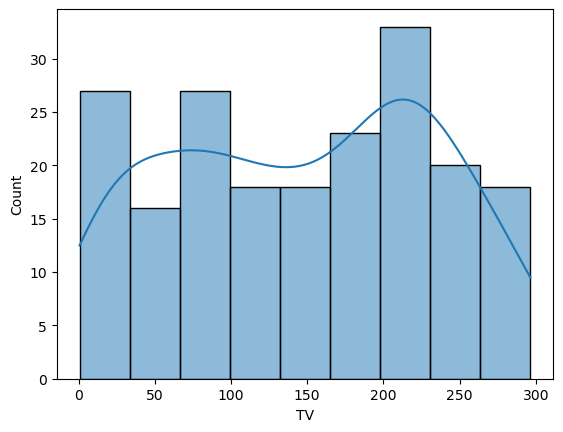

In [8]:
sns.histplot(df1.TV, kde=True)

<AxesSubplot:xlabel='Radio', ylabel='Count'>

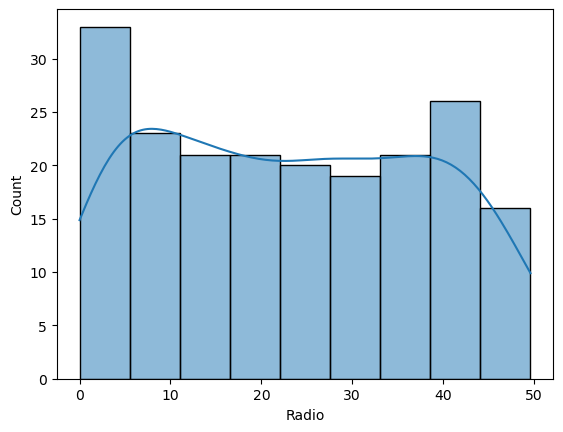

In [9]:
sns.histplot(df1.Radio, kde=True)

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

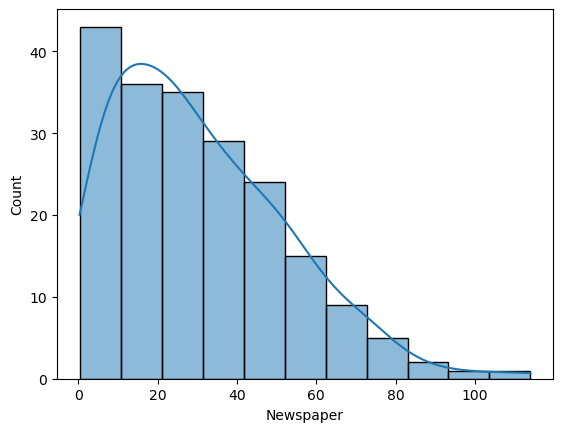

In [10]:
sns.histplot(df1.Newspaper, kde=True)

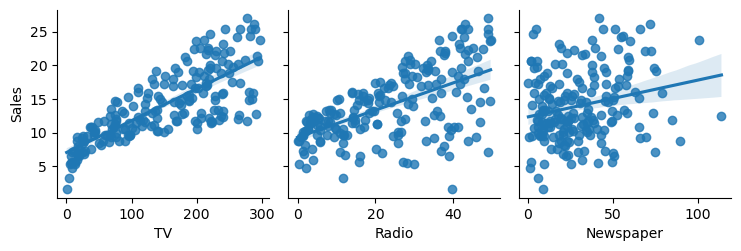

In [11]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')

# Making model using Linear Regression

In [12]:
x = df1.drop('Sales', axis='columns')
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
y = df1.Sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
x_train.shape

(140, 3)

In [16]:
x_test.shape

(60, 3)

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
model.score(x_test, y_test)

0.9285908549617652

# Prediction and Accuracy

In [20]:
y_pred = model.predict(x_test)
y_pred

array([22.14197782, 11.83902258, 10.4762047 , 12.77004548,  5.4058736 ,
       15.16148512,  9.75735609,  8.83549391,  6.15472622, 18.32407001,
       12.54818918, 15.33252465,  6.0775494 ,  8.79998207, 22.79690146,
       20.70738845, 10.17473389,  7.66882114, 13.17177184, 18.90717121,
       12.63194558, 18.79985587, 21.79727694, 13.35255445, 12.44155863,
       21.05129393, 15.45862144, 12.81421633, 18.34585401, 19.86571136,
        3.64047155, 16.97252689, 15.26660396, 16.43021719,  8.18146809,
        7.86008356, 23.29172271, 16.33554957, 14.33453677, 20.69271026,
       21.55876875, 19.90435154, 12.7517628 ,  9.6846563 ,  7.90592381,
       10.3444791 ,  6.83708536, 11.41525046,  8.88959798, 15.12623928,
       17.72287279,  7.05937081, 15.52900379, 24.01696811,  5.33254369,
       18.06633471, 18.05011579, 10.79530654, 21.50794264,  8.43181344])

In [21]:
from sklearn import metrics

print('MAE : ',metrics.mean_absolute_error(y_pred,y_test))
print('RMSE : ',np.sqrt(metrics.mean_absolute_error(y_pred,y_test)))
print('r-Squared : ',metrics.r2_score(y_pred,y_test))

MAE :  1.2073893094030126
RMSE :  1.0988126816719093
r-Squared :  0.9199380410339931


<AxesSubplot:>

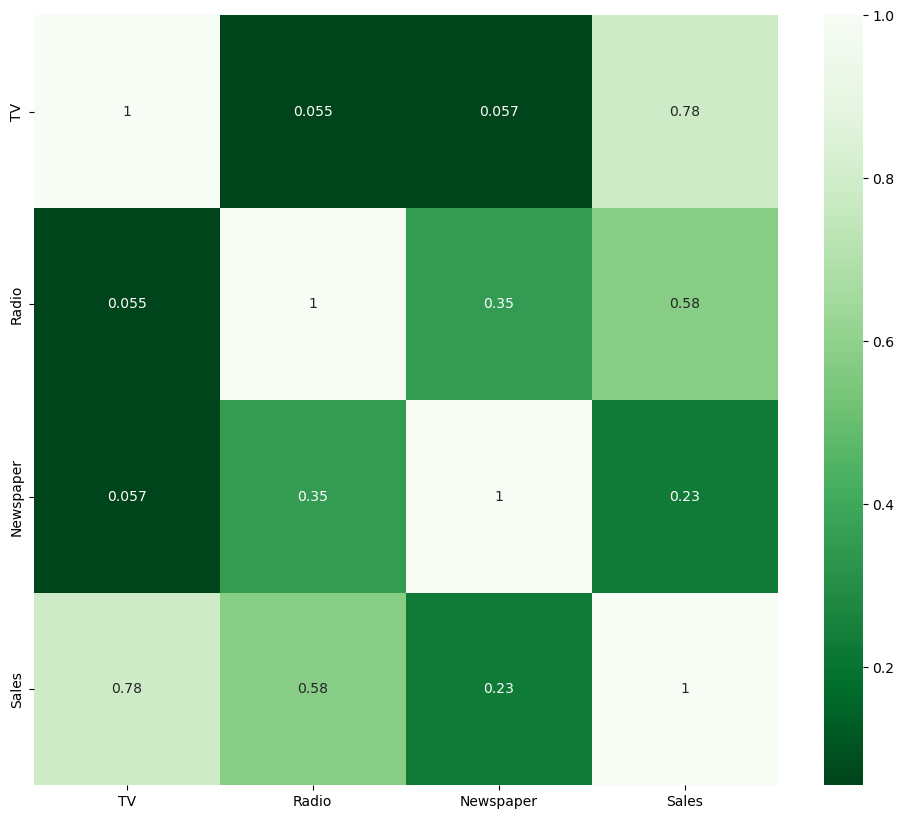

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(['Unnamed: 0'],axis=1).corr(),annot=True,cmap='Greens_r')